# Importing Libraries and Loading the Dataset

In [29]:
# For EDA
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, RobustScaler
from imblearn.over_sampling import SMOTE
import warnings

warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")
warnings.filterwarnings("ignore", category=UserWarning, module="IPython.core.pylabtools")

# For Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression, BayesianRidge
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers import Dense
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.exceptions import FitFailedWarning

# For Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [30]:
# loading the heart dataset
heart_df = pd.read_csv("heart.csv")
heart_df

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N      0.0       Up             0  
1      156              N      1.0     Flat             1  
2       98              N      0.0       Up             0  
3      108              Y      1.5     Flat             1  
4      122              N      0.0       Up             0  
..     ...            ...      ...      ...           ...  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0  

[918 rows x 12 columns]

In [31]:
# Displaying Random 5 samples
heart_df.sample(5)

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
9     48   F           ATA        120          284          0     Normal   
344   51   M           ASY        120            0          1     Normal   
878   49   M           ATA        130          266          0     Normal   
683   44   F           NAP        118          242          0     Normal   
381   50   M           ASY        115            0          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
9      120              N      0.0       Up             0  
344    104              N      0.0     Flat             1  
878    171              N      0.6       Up             0  
683    149              N      0.3     Flat             0  
381    120              Y      0.5     Flat             1

In [33]:
# Getting dataset summary
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [35]:
heart_df.shape

(918, 12)

In [37]:
heart_df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [38]:
# Getting dataset statistics
heart_df.describe()

Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   746.000000  918.000000  918.000000   
mean    53.510893  132.396514   244.635389    0.233115  136.809368   
std      9.432617   18.514154    59.153524    0.423046   25.460334   
min     28.000000    0.000000    85.000000    0.000000   60.000000   
25%     47.000000  120.000000   207.250000    0.000000  120.000000   
50%     54.000000  130.000000   237.000000    0.000000  138.000000   
75%     60.000000  140.000000   275.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000

In [39]:
heart_df.describe(include="all")

Age  Sex ChestPainType   RestingBP  Cholesterol   FastingBS  \
count   918.000000  918           918  918.000000   746.000000  918.000000   
unique         NaN    2             4         NaN          NaN         NaN   
top            NaN    M           ASY         NaN          NaN         NaN   
freq           NaN  725           496         NaN          NaN         NaN   
mean     53.510893  NaN           NaN  132.396514   244.635389    0.233115   
std       9.432617  NaN           NaN   18.514154    59.153524    0.423046   
min      28.000000  NaN           NaN    0.000000    85.000000    0.000000   
25%      47.000000  NaN           NaN  120.000000   207.250000    0.000000   
50%      54.000000  NaN           NaN  130.000000   237.000000    0.000000   
75%      60.000000  NaN           NaN  140.000000   275.000000    0.000000   
max      77.000000  NaN           NaN  200.000000   603.000000    1.000000   

       RestingECG       MaxHR ExerciseAngina     Oldpeak ST_Slope  \
count         918  918.000000            918  918.000000      918   
unique          3         NaN              2         NaN        3   
top        Normal         NaN              N         NaN     Flat   
freq          552         NaN            547         NaN      460   
mean          NaN  136.809368            NaN    0.887364      NaN   
std           NaN   25.460334            NaN    1.066570      NaN   
min           NaN   60.000000            NaN   -2.600000      NaN   
25%           NaN  120.000000            NaN    0.000000      NaN   
50%           NaN  138.000000            NaN    0.600000      NaN   
75%           NaN  156.000000            NaN    1.500000      NaN   
max           NaN  202.000000            NaN    6.200000      NaN   

        HeartDisease  
count     918.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean        0.553377  
std         0.497414  
min         0.000000  
25%         0.000000  
50%         1.000000  
75%         1.000000  
max         1.000000

# Data Preprocessing

In [40]:
# checking the Null Values
heart_df.isnull().sum()

Age                 0
Sex                 0
ChestPainType       0
RestingBP           0
Cholesterol       172
FastingBS           0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak             0
ST_Slope            0
HeartDisease        0
dtype: int64

In [41]:
# checking the duplicates
heart_df.duplicated().sum()

np.int64(0)

In [42]:
# checking number of unique values in each feature
heart_df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       221
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [43]:
cat_col = heart_df.select_dtypes(include="object").columns

In [44]:
heart_df['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

Converting Categorical Variables to Numeric

*   Sex: M = 0, F = 1
*   ChestPainType: ATA = 0, NAP = 1, ASY = 2, TA = 3
*   RestingECG: Normal = 0, ST = 1, LVH = 2
*   ExerciseAngina: N = 0, Y = 1
*   ST_Slope: Up = 0, Flat = 1, Down = 2







In [45]:
for col in cat_col:
  print(col)
  print((heart_df[col].unique()),list(range(heart_df[col].nunique())))
  heart_df[col].replace((heart_df[col].unique()), range(heart_df[col].nunique()), inplace=True)
  print('*'*90)
  print()

Sex
['M' 'F'] [0, 1]
******************************************************************************************

ChestPainType
['ATA' 'NAP' 'ASY' 'TA'] [0, 1, 2, 3]
******************************************************************************************

RestingECG
['Normal' 'ST' 'LVH'] [0, 1, 2]
******************************************************************************************

ExerciseAngina
['N' 'Y'] [0, 1]
******************************************************************************************

ST_Slope
['Up' 'Flat' 'Down'] [0, 1, 2]
******************************************************************************************



C:\Users\Dell\AppData\Local\Temp\ipykernel_26008\310813673.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  heart_df[col].replace((heart_df[col].unique()), range(heart_df[col].nunique()), inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_26008\310813673.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcas

In [46]:
heart_df

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    0              0        140        289.0          0           0   
1     49    1              1        160        180.0          0           0   
2     37    0              0        130        283.0          0           1   
3     48    1              2        138        214.0          0           0   
4     54    0              1        150        195.0          0           0   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    0              3        110        264.0          0           0   
914   68    0              2        144        193.0          1           0   
915   57    0              2        130        131.0          0           0   
916   57    1              0        130        236.0          0           2   
917   38    0              1        138        175.0          0           0   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0      172               0      0.0         0             0  
1      156               0      1.0         1             1  
2       98               0      0.0         0             0  
3      108               1      1.5         1             1  
4      122               0      0.0         0             0  
..     ...             ...      ...       ...           ...  
913    132               0      1.2         1             1  
914    141               0      3.4         1             1  
915    115               1      1.2         1             1  
916    174               0      0.0         1             1  
917    173               0      0.0         0             0  

[918 rows x 12 columns]

In [47]:
heart_df['Cholesterol'].value_counts()

Cholesterol
254.0    11
223.0    10
220.0    10
230.0     9
211.0     9
         ..
353.0     1
278.0     1
157.0     1
176.0     1
131.0     1
Name: count, Length: 221, dtype: int64

Cholesterol cannot be 0, it states that the reading was not properly noted.

# Imputing the 0 values in cholesterol column with KNN Imputer

In [48]:
np.nan

nan

In [49]:
heart_df['Cholesterol'].replace(0, np.nan, inplace=True)


In [50]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
after_impute = imputer.fit_transform(heart_df)
heart_df = pd.DataFrame(after_impute, columns=heart_df.columns)

In [51]:
heart_df['Cholesterol'].isna().sum()

np.int64(0)

In [52]:
count = 0
for i in heart_df['Cholesterol']:
  if i == 0:
    count += 1
print(count)

0


# Doing the same for Resting Blood Pressure

In [53]:
heart_df['RestingBP'][heart_df['RestingBP'] == 0]

449    0.0
Name: RestingBP, dtype: float64

In [54]:
from sklearn.impute import KNNImputer
heart_df['RestingBP'].replace(0, np.nan, inplace=True)
imputer = KNNImputer(n_neighbors=3)
after_impute = imputer.fit_transform(heart_df)
heart_df = pd.DataFrame(after_impute, columns=heart_df.columns)

C:\Users\Dell\AppData\Local\Temp\ipykernel_26008\4035270334.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  heart_df['RestingBP'].replace(0, np.nan, inplace=True)


In [55]:
heart_df['RestingBP'].unique()

array([140., 160., 130., 138., 150., 120., 110., 136., 115., 100., 124.,
       113., 125., 145., 112., 132., 118., 170., 142., 190., 135., 180.,
       108., 155., 128., 106.,  92., 200., 122.,  98., 105., 133.,  95.,
        80., 137., 185., 165., 126., 152., 116., 144., 154., 134., 104.,
       139., 131., 141., 178., 146., 158., 123., 102.,  96., 143., 172.,
       156., 114., 127., 101., 174.,  94., 148., 117., 192., 129., 164.])

In [56]:
heart_df['RestingECG'].unique()

array([0., 1., 2.])

In [57]:
heart_df['RestingBP'].isnull().sum()

np.int64(0)

# Change columns type to int

In [58]:
withoutOldPeak = heart_df.columns
withoutOldPeak = withoutOldPeak.drop('Oldpeak')
heart_df[withoutOldPeak] = heart_df[withoutOldPeak].astype('int32')

In [59]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int32  
 1   Sex             918 non-null    int32  
 2   ChestPainType   918 non-null    int32  
 3   RestingBP       918 non-null    int32  
 4   Cholesterol     918 non-null    int32  
 5   FastingBS       918 non-null    int32  
 6   RestingECG      918 non-null    int32  
 7   MaxHR           918 non-null    int32  
 8   ExerciseAngina  918 non-null    int32  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int32  
 11  HeartDisease    918 non-null    int32  
dtypes: float64(1), int32(11)
memory usage: 46.7 KB


In [60]:
heart_df.sample()

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
562   59    0              2        140          274          0           0   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
562    154               1      2.0         1             0

In [61]:
heart_df.corr()['HeartDisease'][:-1].sort_values()

MaxHR            -0.400421
Sex              -0.305445
RestingECG        0.061011
Cholesterol       0.101263
RestingBP         0.118333
FastingBS         0.267291
Age               0.282039
Oldpeak           0.403951
ChestPainType     0.459017
ExerciseAngina    0.494282
ST_Slope          0.558771
Name: HeartDisease, dtype: float64

In [62]:
heart_df.corr()

Age       Sex  ChestPainType  RestingBP  Cholesterol  \
Age             1.000000 -0.055750       0.214164   0.263128     0.057108   
Sex            -0.055750  1.000000      -0.179766  -0.009658     0.080395   
ChestPainType   0.214164 -0.179766       1.000000   0.073016     0.038855   
RestingBP       0.263128 -0.009658       0.073016   1.000000     0.113194   
Cholesterol     0.057108  0.080395       0.038855   0.113194     1.000000   
FastingBS       0.198039 -0.120076       0.155111   0.067556     0.058798   
RestingECG      0.213152  0.018343       0.112067   0.094144     0.074925   
MaxHR          -0.382045  0.189186      -0.273076  -0.109329    -0.028855   
ExerciseAngina  0.215793 -0.190664       0.324049   0.152621     0.083761   
Oldpeak         0.258612 -0.105734       0.300846   0.174464     0.065988   
ST_Slope        0.268264 -0.150693       0.352364   0.082401     0.071345   
HeartDisease    0.282039 -0.305445       0.459017   0.118333     0.101263   

                FastingBS  RestingECG     MaxHR  ExerciseAngina   Oldpeak  \
Age              0.198039    0.213152 -0.382045        0.215793  0.258612   
Sex             -0.120076    0.018343  0.189186       -0.190664 -0.105734   
ChestPainType    0.155111    0.112067 -0.273076        0.324049  0.300846   
RestingBP        0.067556    0.094144 -0.109329        0.152621  0.174464   
Cholesterol      0.058798    0.074925 -0.028855        0.083761  0.065988   
FastingBS        1.000000    0.050707 -0.131438        0.060451  0.052698   
RestingECG       0.050707    1.000000  0.048552        0.036119  0.114428   
MaxHR           -0.131438    0.048552  1.000000       -0.370425 -0.160691   
ExerciseAngina   0.060451    0.036119 -0.370425        1.000000  0.408752   
Oldpeak          0.052698    0.114428 -0.160691        0.408752  1.000000   
ST_Slope         0.175774    0.078807 -0.343419        0.428706  0.501921   
HeartDisease     0.267291    0.061011 -0.400421        0.494282  0.403951   

                ST_Slope  HeartDisease  
Age             0.268264      0.282039  
Sex            -0.150693     -0.305445  
ChestPainType   0.352364      0.459017  
RestingBP       0.082401      0.118333  
Cholesterol     0.071345      0.101263  
FastingBS       0.175774      0.267291  
RestingECG      0.078807      0.061011  
MaxHR          -0.343419     -0.400421  
ExerciseAngina  0.428706      0.494282  
Oldpeak         0.501921      0.403951  
ST_Slope        1.000000      0.558771  
HeartDisease    0.558771      1.000000

In [63]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


# Data Visualization

In [64]:
import plotly.express as px

In [65]:
px.line(heart_df.corr()['HeartDisease'][:-1].sort_values())

**Age and HeartDisease Distribution**

In [66]:
px.sunburst(heart_df,path=['HeartDisease','Age'])

In [67]:
px.histogram(heart_df, x='Age', color='HeartDisease')

# Percentage of HeartDisease data distribution

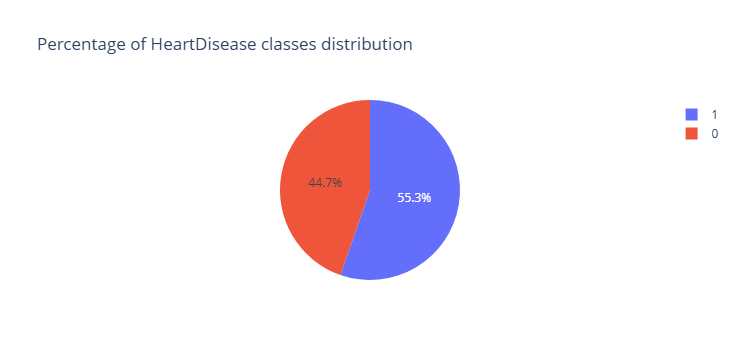

In [68]:
# Percentage of HeartDisease data distribution
px.pie(heart_df, names='HeartDisease', title= 'Percentage of HeartDisease classes distribution')

# Sex vs Heart Disease

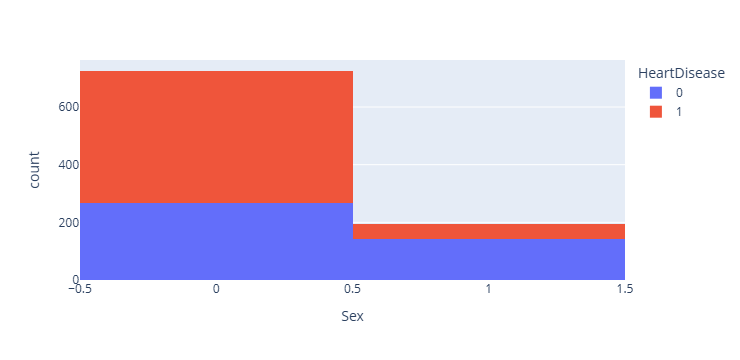

In [69]:
px.histogram(heart_df, x='Sex', color='HeartDisease')

# ChestPainType vs HeartDisease

In [70]:
px.histogram(heart_df, x='ChestPainType', color='HeartDisease')
# ChestPainType : ATA = 0, NAP = 1, ASY = 2, TA = 3

# RestingBP vs HeartDisease

In [71]:
heart_df['RestingBP'].unique()

array([140, 160, 130, 138, 150, 120, 110, 136, 115, 100, 124, 113, 125,
       145, 112, 132, 118, 170, 142, 190, 135, 180, 108, 155, 128, 106,
        92, 200, 122,  98, 105, 133,  95,  80, 137, 185, 165, 126, 152,
       116, 144, 154, 134, 104, 139, 131, 141, 178, 146, 158, 123, 102,
        96, 143, 172, 156, 114, 127, 101, 174,  94, 148, 117, 192, 129,
       164], dtype=int32)

In [72]:
px.sunburst(heart_df,path=['HeartDisease','RestingBP'])

# FastingBS vs HeartDisease

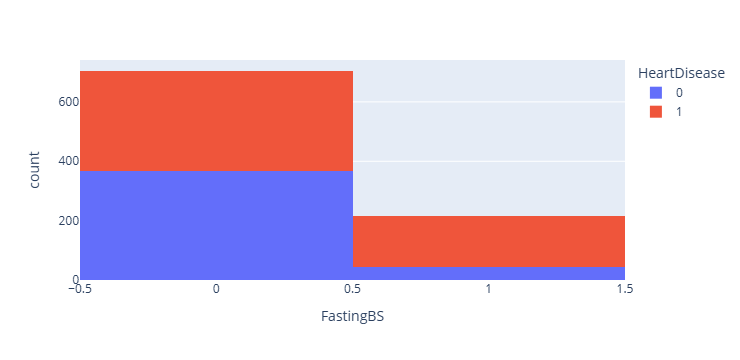

In [73]:
px.histogram(heart_df, x='FastingBS', color='HeartDisease')

# MaxHR vs HeartDisease

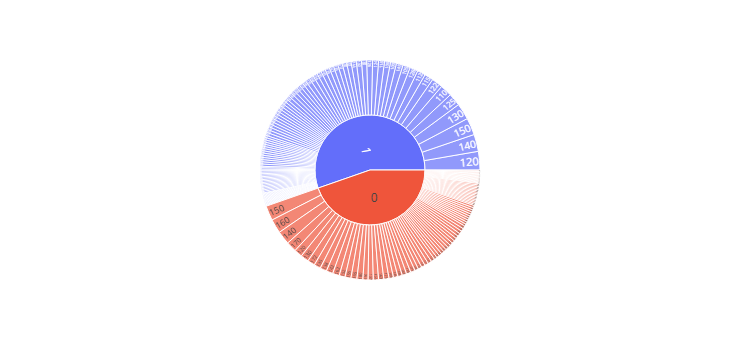

In [74]:
px.sunburst(heart_df,path=['HeartDisease','MaxHR'])

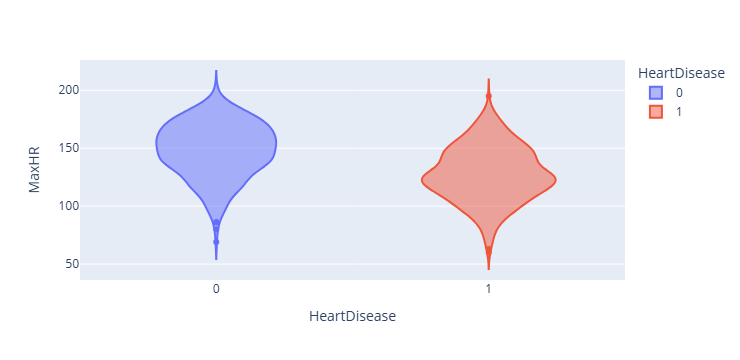

In [75]:
px.violin(heart_df,x='HeartDisease', y='MaxHR', color='HeartDisease')

# Oldpeak vs Heart Disease

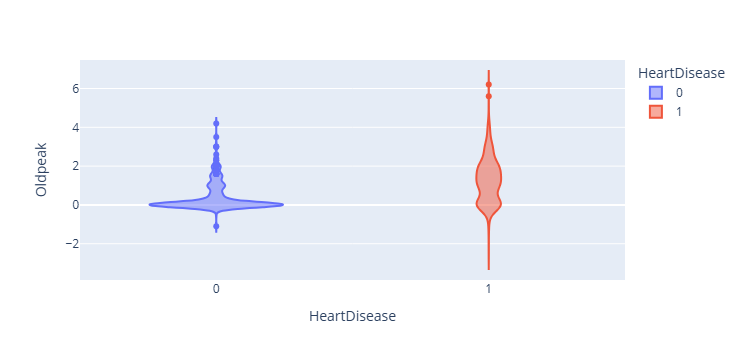

In [76]:
px.violin(heart_df,x='HeartDisease', y='Oldpeak', color='HeartDisease')

# ST_Slope vs Heart Disease

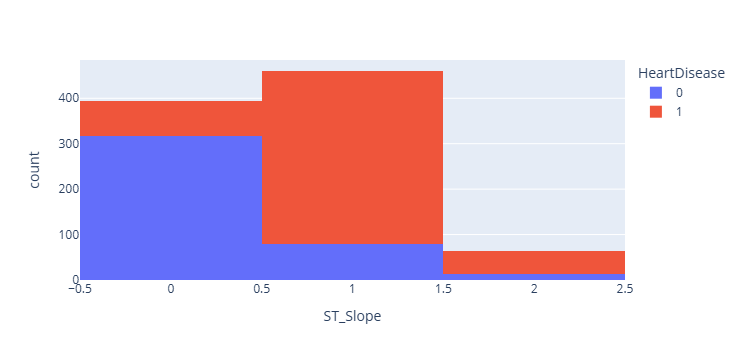

In [77]:
px.histogram(heart_df, x='ST_Slope', color='HeartDisease')

# ExerciseAngina vs Heart Disease

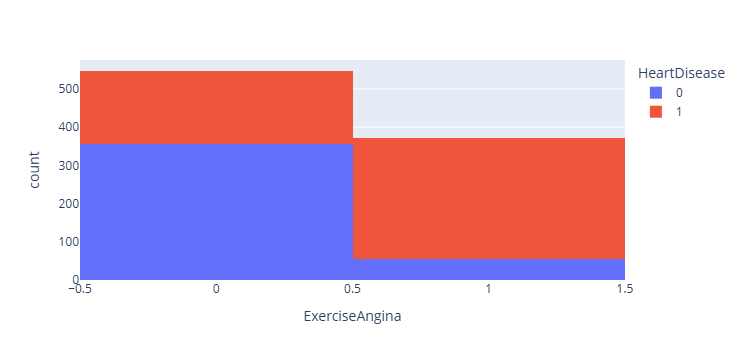

In [78]:
px.histogram(heart_df, x='ExerciseAngina', color='HeartDisease')

# Train Test Split

In [79]:
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# -----------------------------
# 1️⃣ Load Dataset
# -----------------------------
df = pd.read_csv('heart.csv')

# -----------------------------
# 2️⃣ Define target and features
# -----------------------------
target_column = 'HeartDisease'
feature_columns = [col for col in df.columns if col != target_column]

X = df[feature_columns]
y = df[target_column]

# -----------------------------
# 3️⃣ Identify categorical and numerical columns
# -----------------------------
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# -----------------------------
# 4️⃣ Encode categorical columns
# -----------------------------
encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    encoders[col] = le

# -----------------------------
# 5️⃣ Scale numerical columns
# -----------------------------
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# -----------------------------
# 6️⃣ Save scaler and encoders
# -----------------------------
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

with open('encoders.pkl', 'wb') as f:
    pickle.dump(encoders, f)

with open('feature_columns.pkl', 'wb') as f:
    pickle.dump(feature_columns, f)

print("✅ Scaler, encoders, and feature columns saved successfully!")

# -----------------------------
# 7️⃣ Optional: Split Data
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("✅ Data split complete!")


✅ Scaler, encoders, and feature columns saved successfully!
✅ Data split complete!


C:\Users\Dell\AppData\Local\Temp\ipykernel_26008\4047504950.py:33: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Dell\AppData\Local\Temp\ipykernel_26008\4047504950.py:33: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Dell\AppData\Local\Temp\ipykernel_26008\4047504950.py:33: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [80]:
print("Feature columns:")
print(X_train.columns.tolist())

# Print target column name
print("\nTarget column:")
print(y_train.name)

Feature columns:
['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']

Target column:
HeartDisease


# Model Training

# Logistic Regression

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.exceptions import ConvergenceWarning

# Suppress ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
solver = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
best_solver = ''
test_score = np.zeros(len(solver))
for i, solver in enumerate(solver):
  lr = LogisticRegression(solver=solver, max_iter=2000).fit(X_train,y_train)
  test_score[i] = lr.score(X_test, y_test)
  if lr.score(X_test, y_test) == test_score.max():
    best_solver = solver

print(best_solver)
lr = LogisticRegression(solver=best_solver, max_iter=2000)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print(f'LogisticRegression Score: {accuracy_score(y_test, lr_pred)}')

liblinear
LogisticRegression Score: 0.8804347826086957


In [82]:
from sklearn.metrics import confusion_matrix

In [83]:
cm=confusion_matrix(y_test,lr_pred)

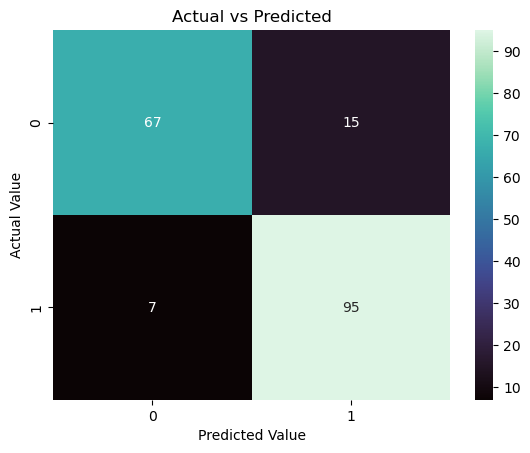

In [84]:
plt.title('Actual vs Predicted')
sns.heatmap(cm,annot = True,cmap='mako')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

In [85]:
cm

array([[67, 15],
       [ 7, 95]])

In [86]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report

In [87]:
precision_score(y_test,lr_pred)

0.8636363636363636

In [88]:
accuracy_score(y_test,lr_pred)

0.8804347826086957

In [89]:
rs=recall_score(y_test,lr_pred)
print('Recall Score is :',rs)

Recall Score is : 0.9313725490196079


In [90]:
f1_sc=f1_score(y_test,lr_pred)

In [91]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86        82
           1       0.86      0.93      0.90       102

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.88       184
weighted avg       0.88      0.88      0.88       184



In [92]:
#Model Score same as Accuray Score
lr_score=lr.score(X_test,y_test)
lr_score

0.8804347826086957

In [93]:
import pickle
file = open('LogisticR.pkl','wb')
pickle.dump(lr,file)

# Support Vector Machine (SVM)

In [94]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score

kernels = {'linear':0, 'poly':0, 'rbf':0, 'sigmoid':0}
best = ''
for i in kernels:
  svm = SVC(kernel=i)
  svm.fit(X_train, y_train)
  yhat = svm.predict(X_test)
  kernels[i] = f1_score(y_test, yhat, average="weighted")
  if kernels[i] == max(kernels.values()):
    best = i

print(best)
svm = SVC(kernel=best)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
print(f'SVM f1_score kernel({best}): {f1_score(y_test, svm_pred, average="weighted")}')

rbf
SVM f1_score kernel(rbf): 0.8798726314961868


In [95]:
cm=confusion_matrix(y_test,svm_pred)

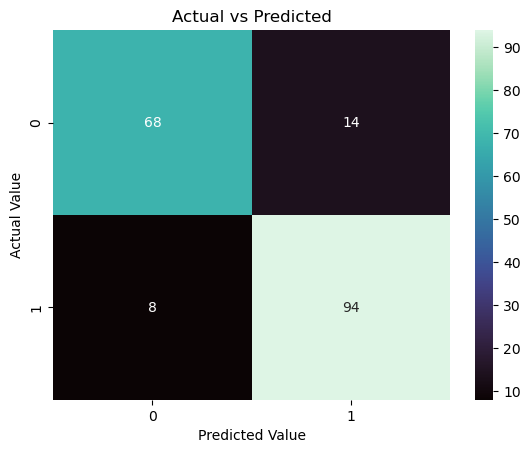

In [96]:
plt.title('Actual vs Predicted')
sns.heatmap(cm,annot = True,cmap='mako')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

In [97]:
precision_score(y_test,svm_pred)

0.8703703703703703

In [98]:
accuracy_score(y_test,svm_pred)

0.8804347826086957

In [99]:
rs=recall_score(y_test,svm_pred)
print('Recall Score is :',rs)

Recall Score is : 0.9215686274509803


In [100]:
f1_sc=f1_score(y_test,svm_pred)

In [101]:
print(classification_report(y_test,svm_pred))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        82
           1       0.87      0.92      0.90       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



Checking Model Score


In [102]:
#Model Score same as Accuray Score
svm_score=svm.score(X_test,y_test)
svm_score

0.8804347826086957

In [103]:
import pickle
file = open('SVM.pkl','wb')
pickle.dump(lr,file)

# Decision Tree Model


In [104]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dtree = DecisionTreeClassifier(class_weight='balanced')
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'random_state': [0, 42]
}
grid_search = GridSearchCV(dtree, param_grid, cv=5)
grid_search.fit(X_train, y_train)
Ctree = DecisionTreeClassifier(**grid_search.best_params_, class_weight='balanced')
Ctree.fit(X_train, y_train)
dtc_pred = Ctree.predict(X_test)
print("DecisionTrees's Accuracy: ", accuracy_score(y_test, dtc_pred))

DecisionTrees's Accuracy:  0.8206521739130435


In [105]:
cm=confusion_matrix(y_test,dtc_pred)

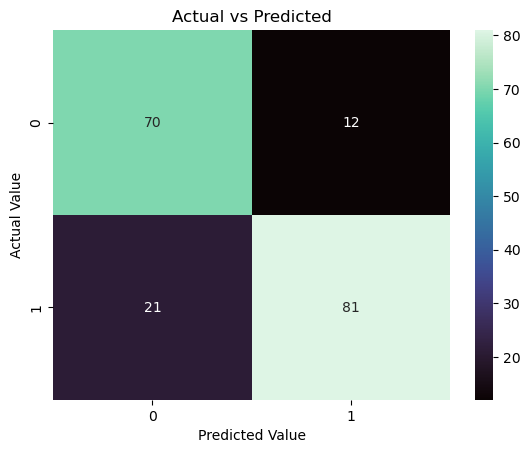

In [106]:
plt.title('Actual vs Predicted')
sns.heatmap(cm,annot = True,cmap='mako')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

In [107]:
precision_score(y_test,dtc_pred)

0.8709677419354839

In [108]:
accuracy_score(y_test,dtc_pred)

0.8206521739130435

In [109]:
rs=recall_score(y_test,dtc_pred)
print('Recall Score is :',rs)

Recall Score is : 0.7941176470588235


In [110]:
f1_sc=f1_score(y_test,dtc_pred)

In [111]:
print(classification_report(y_test,dtc_pred))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81        82
           1       0.87      0.79      0.83       102

    accuracy                           0.82       184
   macro avg       0.82      0.82      0.82       184
weighted avg       0.83      0.82      0.82       184



Checking Model Score

In [112]:
#Model Score same as Accuray Score
dtc_score=Ctree.score(X_test,y_test)
dtc_score

0.8206521739130435

In [113]:
import pickle
file = open('DecisionTree.pkl','wb')
pickle.dump(lr,file)

# Random Forest Classifier

In [114]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier()
param_grid = {
    'n_estimators': [50, 100, 150, 500],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9, 19],
    'max_leaf_nodes': [3, 6, 9],
}
grid_search = GridSearchCV(rfc, param_grid)
grid_search.fit(X_train, y_train)
rfctree = RandomForestClassifier(**grid_search.best_params_)
rfctree.fit(X_train, y_train)
rfc_pred = rfctree.predict(X_test)
print("RandomForest's Accuracy: ", accuracy_score(y_test, rfc_pred))

RandomForest's Accuracy:  0.8804347826086957


In [115]:
cm=confusion_matrix(y_test,rfc_pred)

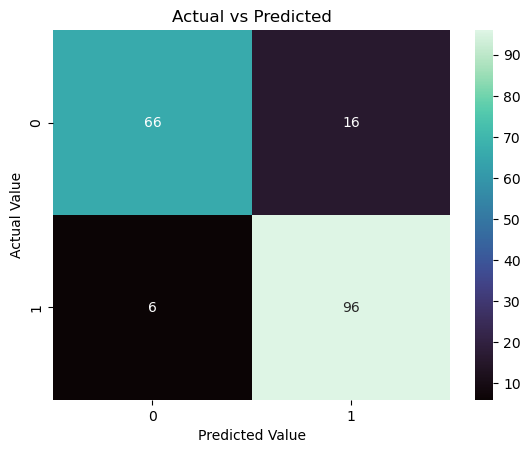

In [116]:
plt.title('Actual vs Predicted')
sns.heatmap(cm,annot = True,cmap='mako')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

In [117]:
precision_score(y_test,rfc_pred)

0.8571428571428571

In [118]:
accuracy_score(y_test,rfc_pred)

0.8804347826086957

In [119]:
rs=recall_score(y_test,rfc_pred)
print('Recall Score is :',rs)

Recall Score is : 0.9411764705882353


In [120]:
f1_sc=f1_score(y_test,rfc_pred)

In [121]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.92      0.80      0.86        82
           1       0.86      0.94      0.90       102

    accuracy                           0.88       184
   macro avg       0.89      0.87      0.88       184
weighted avg       0.88      0.88      0.88       184



Checking Model Score

In [122]:
#Model Score same as Accuray Score
rfc_score=rfctree.score(X_test,y_test)
rfc_score

0.8804347826086957

In [123]:
import pickle
file = open('RandomForest.pkl','wb')
pickle.dump(lr,file)

# Naive Bayes ML Model

In [124]:
from sklearn.naive_bayes import GaussianNB

# Create the model
model_selection = GaussianNB()

# Train the model (assuming X_train and y_train are already defined)
model_selection.fit(X_train, y_train)

GaussianNB()

In [125]:
y_pred=model_selection.predict(X_test)

Checking Model Score

In [126]:
nv_score=model_selection.score(X_test,y_test)
print(nv_score)

0.8913043478260869


In [127]:
print('Accuracy Score:',accuracy_score(y_test,y_pred))
print('Precision Score:',precision_score(y_test,y_pred))
print('Recall Score:',recall_score(y_test,y_pred))
print('F1 Score:',f1_score(y_test,y_pred))

Accuracy Score: 0.8913043478260869
Precision Score: 0.8942307692307693
Recall Score: 0.9117647058823529
F1 Score: 0.9029126213592233


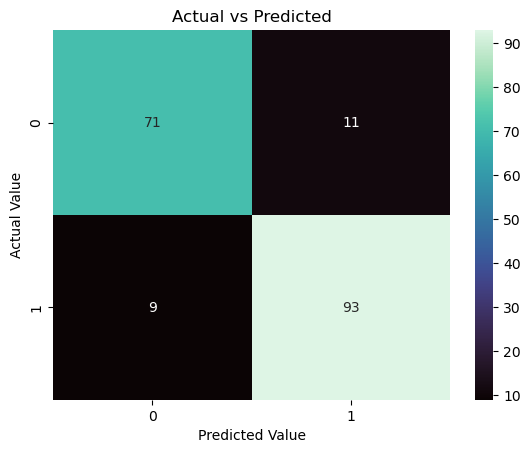

In [128]:
cm=confusion_matrix(y_test,y_pred)
plt.title('Actual vs Predicted')
sns.heatmap(cm,annot = True,cmap='mako')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

In [129]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88        82
           1       0.89      0.91      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184



# Ensemble Boosting Technique: Adaboost, Gradientboost, XGboost
- Adaboost: Adaptive Boosting
- Gradientboost:GBM
- LBM:Gradientboost: LGBM(Light Gradient Bossting Model)
- XGBoost:Extreme Gradient Boosting:
- Catboost: Categorical : Texual Data

###### Import XGboost ML Algorithm


In [130]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [131]:
import xgboost
print('done')

done


In [132]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

Model Prediction

In [133]:
y_pred=model_xgb.predict(X_test)

Checking Model Score

In [134]:
xgb_score=accuracy_score(y_test,y_pred)
xgb_score

0.8695652173913043

# KNN: Regression and Classification

Import KNN

In [135]:
from sklearn.neighbors import KNeighborsClassifier

In [136]:
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Model Prediction

In [137]:
y_pred=model_knn.predict(X_test)

In [138]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85        82
           1       0.88      0.87      0.88       102

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



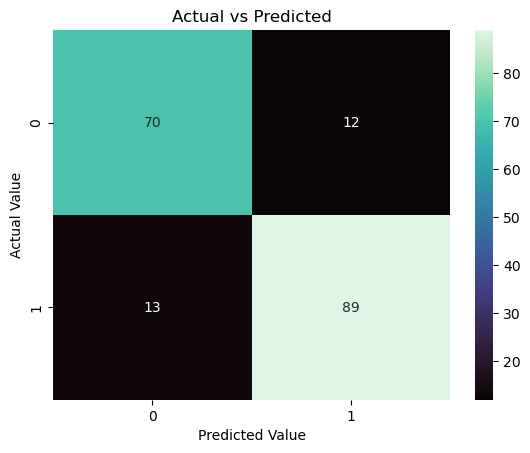

In [139]:
cm=confusion_matrix(y_test,y_pred)
plt.title('Actual vs Predicted')
sns.heatmap(cm,annot = True,cmap='mako')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

Checking Model Score

In [140]:
knn_score=accuracy_score(y_test,y_pred)
knn_score

0.8641304347826086

# DL Model Building

##Define a Function to Plot Training History

In [141]:
def plot_history(history, main_title):
 plt.figure(figsize=(12, 5))
 plt.suptitle(main_title, fontsize=20, fontweight='bold')
 plt.subplot(1, 2, 1)
 plt.plot(history['accuracy'], label='Training Accuracy')
 plt.plot(history['val_accuracy'], label='Validation Accuracy')
 plt.title('Accuracy', fontsize=16)
 plt.xlabel('Epoch', fontsize=12)
 plt.ylabel('Accuracy', fontsize=12)
 plt.legend()
 plt.subplot(1, 2, 2)
 plt.plot(history['loss'], label='Training Loss')
 plt.plot(history['val_loss'], label='Validation Loss')
 plt.title('Loss', fontsize=16)
 plt.xlabel('Epoch', fontsize=12)
 plt.ylabel('Loss', fontsize=12)
 plt.legend()
 plt.tight_layout(rect=[0, 0, 1, 0.92])
 plt.show()


# Neural Network Model

Build the Neural Network Model

In [142]:
# NN Model
simple_nn = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

simple_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
simple_nn.summary()


C:\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

Train the Model

In [143]:
history = simple_nn.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test)
)

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.5681 - loss: 0.6704 - val_accuracy: 0.8478 - val_loss: 0.5553
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7834 - loss: 0.5151 - val_accuracy: 0.8641 - val_loss: 0.4411
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8229 - loss: 0.4252 - val_accuracy: 0.8641 - val_loss: 0.3934
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8351 - loss: 0.3839 - val_accuracy: 0.8804 - val_loss: 0.3769
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8515 - loss: 0.3652 - val_accuracy: 0.8641 - val_loss: 0.3680
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8556 - loss: 0.3515 - val_accuracy: 0.8696 - val_loss: 0.3621
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8542 - loss: 0.3412 - val_accuracy: 0.8641 - val_loss: 0.3564
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8597 - loss: 0.3309 - val_accuracy: 0.8587 - 

Evaluate on Test Data

In [144]:
test_loss, test_accuracy = simple_nn.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.8696


Prediction

In [145]:
y_pred = simple_nn.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int).flatten()

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


Calculate Accuracy

In [146]:
accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8696


Plot Training History

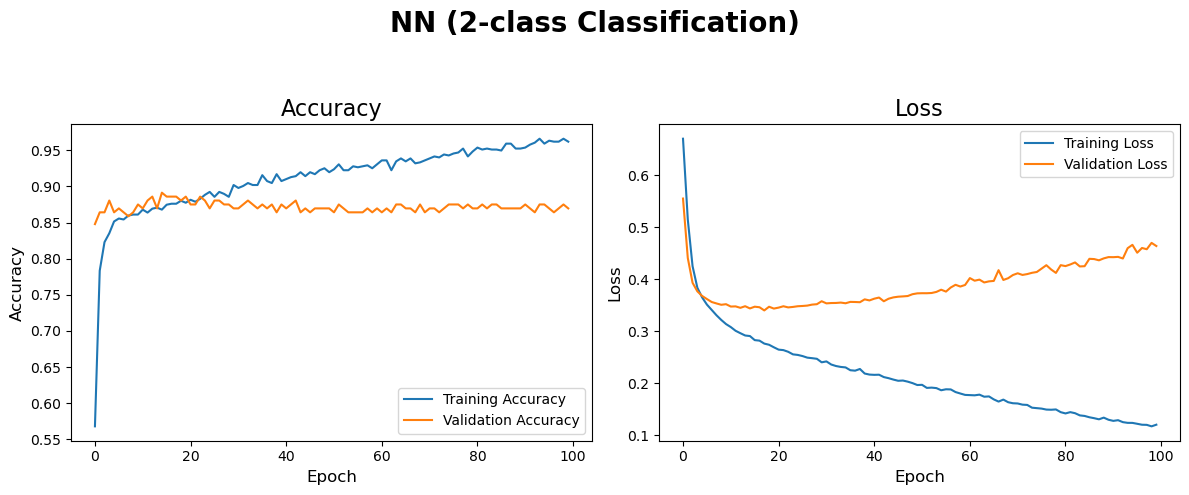

In [147]:
plot_history(history.history, "NN (2-class Classification)")

Confusion Matrix

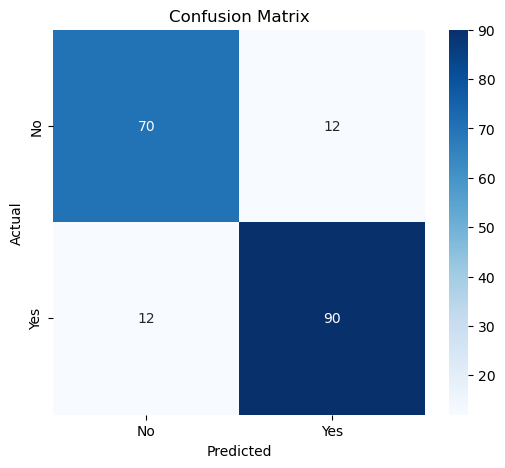

In [148]:
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No', 'Yes'],
            yticklabels=['No', 'Yes'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# DNN Model

###### Build the DNN Model

In [149]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout

# DNN Model - Corrected syntax
dnn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

dnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
dnn_model.summary()

C:\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,673 (49.50 KB)

 Trainable params: 12,289 (48.00 KB)

 Non-trainable params: 384 (1.50 KB)

###### Train the Model

In [150]:
history = dnn_model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test)
)

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.6431 - loss: 0.6641 - val_accuracy: 0.7880 - val_loss: 0.6081
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7779 - loss: 0.4800 - val_accuracy: 0.8152 - val_loss: 0.5394
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8188 - loss: 0.4029 - val_accuracy: 0.8152 - val_loss: 0.4941
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8215 - loss: 0.4067 - val_accuracy: 0.8370 - val_loss: 0.4624
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8338 - loss: 0.3800 - val_accuracy: 0.8261 - val_loss: 0.4367
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8283 - loss: 0.3825 - val_accuracy: 0.8370 - val_loss: 0.4084
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8351 - loss: 0.3537 - val_accuracy: 0.8478 - val_loss: 0.3928
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8433 - loss: 0.3571 - val_accuracy: 0.8587 - 

###### Prediction

In [151]:
y_pred = dnn_model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int).flatten()

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


###### Calculate Accuracy

In [152]:
accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8750


###### Plot Training History

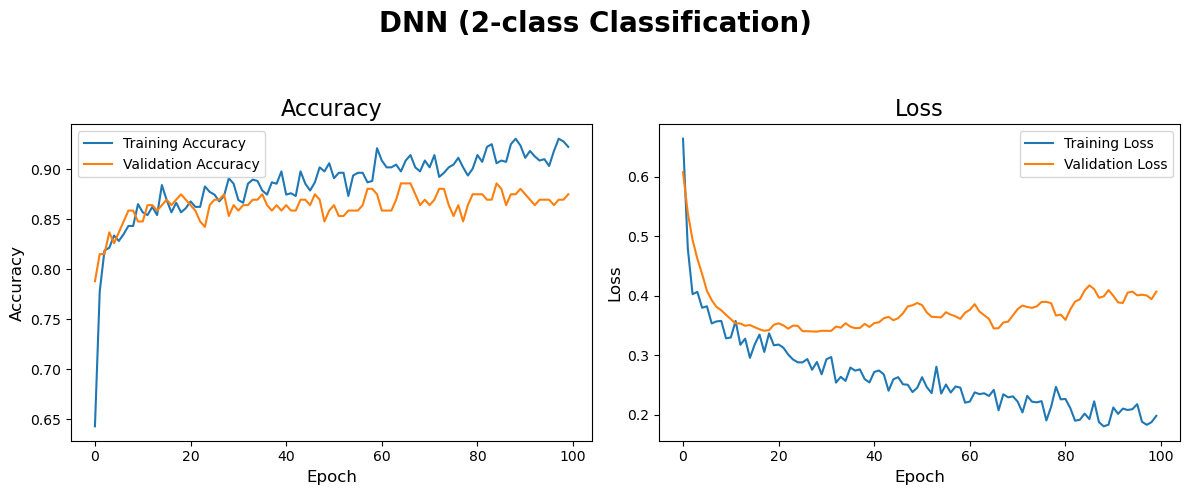

In [153]:
plot_history(history.history, "DNN (2-class Classification)")

###### Confusion Matrix

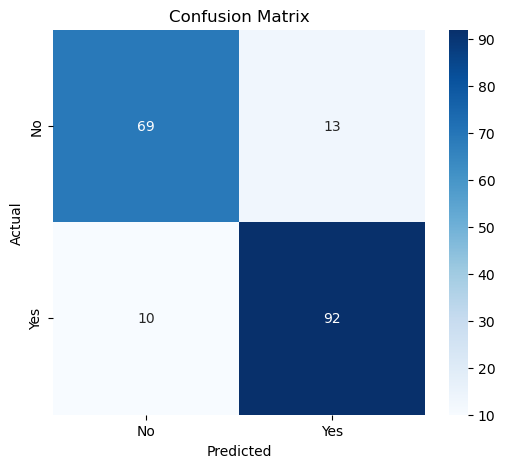

In [154]:
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No', 'Yes'],
            yticklabels=['No', 'Yes'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ANN Model

###### Build the ANN Model

In [155]:
# ML works only on Limited data
# If Input Changes ML Model fail(8 Features col: 8)

In [156]:
#keras tensor flow:
#tensors :array

In [157]:
pip install keras


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [158]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [159]:
from keras.models import Sequential
from keras.layers import Dense

###### Build the ANN Model

In [160]:
ann_model=Sequential()
ann_model.add(Dense(11,activation='relu',input_dim=11))#Dense 1
ann_model.add(Dense(1,activation='sigmoid'))#output will be Nueron for binary
ann_model.compile(loss='binary_crossentropy',#loss to calculate model loss
 optimizer='adam', #optimizer to optimize model learning
 metrics=['accuracy'])# metrics return accuracy score
print('done')

done


C:\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



###### Train the Model

In [161]:
history = ann_model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=16,
    validation_data=(X_test, y_test),
)

Epoch 1/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4496 - loss: 0.7747 - val_accuracy: 0.5054 - val_loss: 0.7038
Epoch 2/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6131 - loss: 0.6287 - val_accuracy: 0.7011 - val_loss: 0.5817
Epoch 3/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7643 - loss: 0.5433 - val_accuracy: 0.7989 - val_loss: 0.5048
Epoch 4/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8079 - loss: 0.4886 - val_accuracy: 0.8315 - val_loss: 0.4528
Epoch 5/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8188 - loss: 0.4515 - val_accuracy: 0.8533 - val_loss: 0.4219
Epoch 6/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8270 - loss: 0.4260 - val_accuracy: 0.8804 - val_loss: 0.4015
Epoch 7/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8297 - loss: 0.4082 - val_accuracy: 0.8804 - val_loss: 0.3878
Epoch 8/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8324 - loss: 0.3953 - val_accuracy: 0.8804 - v

###### Evaluate the Model

In [162]:
test_loss, test_accuracy = ann_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.8859


##### Prediction

In [163]:
y_pred=ann_model.predict(X_test)
y_pred=[round(i[0])for i in y_pred ]
print(y_pred)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
[1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1]


###### Calculate Accuracy

In [164]:
ann_score=accuracy_score(y_test,y_pred)
ann_score

0.8858695652173914

###### Plot Training History

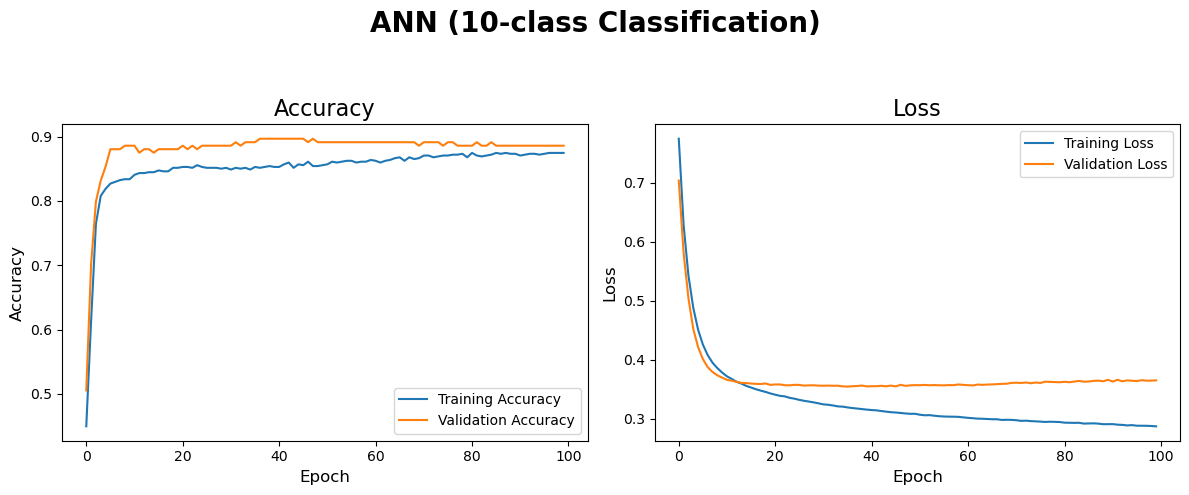

In [165]:
plot_history(history.history, "ANN (10-class Classification)")

###### Confusion Matrix

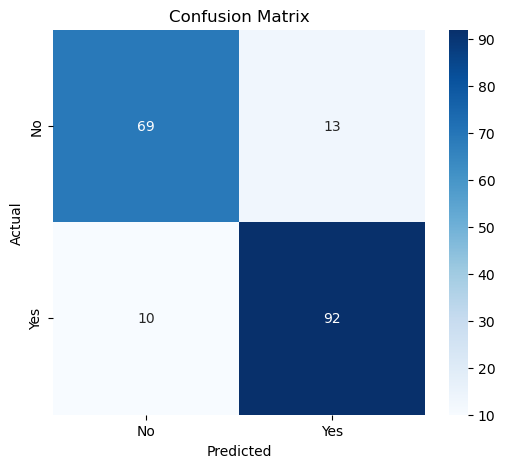

In [166]:
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No', 'Yes'],
            yticklabels=['No', 'Yes'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### MLP Model

###### Build the MLP Model

In [167]:
# MLP Model
mlp_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
mlp_model.summary()

C:\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,857 (38.50 KB)

 Trainable params: 9,857 (38.50 KB)

 Non-trainable params: 0 (0.00 B)

###### Train the Model

In [168]:
history = mlp_model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test)
)

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.6621 - loss: 0.6225 - val_accuracy: 0.8478 - val_loss: 0.4801
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7956 - loss: 0.4911 - val_accuracy: 0.8587 - val_loss: 0.3961
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8106 - loss: 0.4304 - val_accuracy: 0.8641 - val_loss: 0.3825
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8351 - loss: 0.4119 - val_accuracy: 0.8587 - val_loss: 0.3748
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8433 - loss: 0.3907 - val_accuracy: 0.8478 - val_loss: 0.3697
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8392 - loss: 0.3737 - val_accuracy: 0.8587 - val_loss: 0.3611
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8324 - loss: 0.3749 - val_accuracy: 0.8587 - val_loss: 0.3578
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8351 - loss: 0.3697 - val_accuracy: 0.8533 - 

###### Evaluate the Model

In [169]:
test_loss, test_accuracy = mlp_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.8641


###### Predictions

In [170]:
y_pred = mlp_model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int).flatten()

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


###### Calculate Accuracy

In [171]:
accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8641


###### Plot History Training

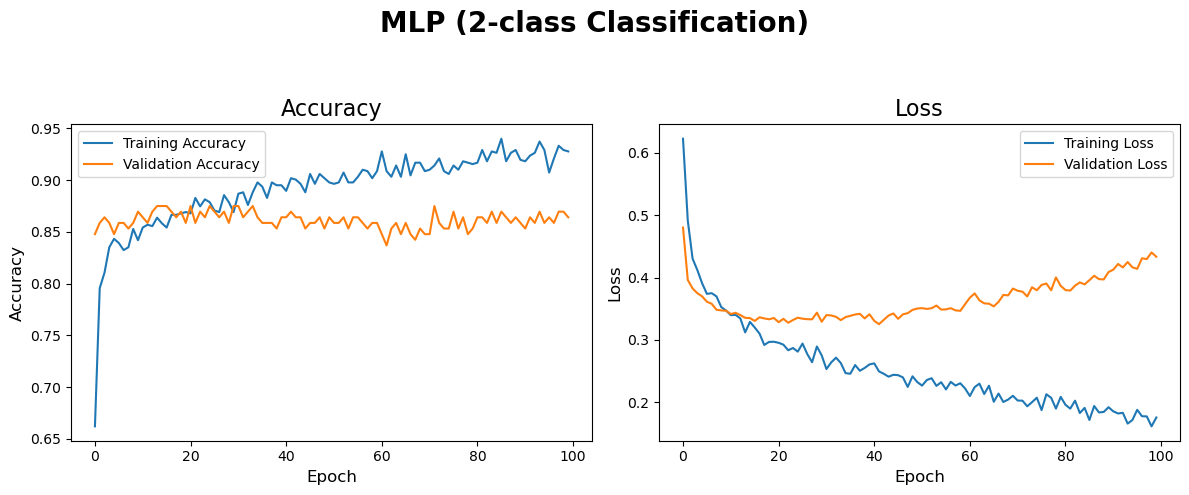

In [172]:
plot_history(history.history, "MLP (2-class Classification)")

###### Confusion Matrix

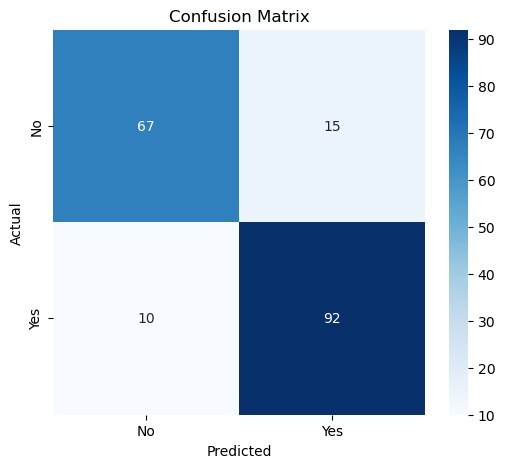

In [173]:
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No', 'Yes'],
            yticklabels=['No', 'Yes'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### CNN Model

###### Reshape Input Data for Conv1D

In [174]:
X_train_np = X_train.values
X_test_np = X_test.values

X_train_reshaped = X_train_np.reshape((X_train_np.shape[0], X_train_np.shape[1], 1))
X_test_reshaped = X_test_np.reshape((X_test_np.shape[0], X_test_np.shape[1], 1))


###### Build the CNN ModeL

In [175]:
cnn_model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

cnn_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

cnn_model.summary()

C:\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 9, 32)          │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 4, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,449 (33.00 KB)

 Trainable params: 8,449 (33.00 KB)

 Non-trainable params: 0 (0.00 B)

###### Train the Model

In [176]:
history = cnn_model.fit(
    X_train_reshaped, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test_reshaped, y_test)
)

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.6049 - loss: 0.6456 - val_accuracy: 0.7989 - val_loss: 0.5724
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7643 - loss: 0.5362 - val_accuracy: 0.8207 - val_loss: 0.4704
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7875 - loss: 0.4704 - val_accuracy: 0.8478 - val_loss: 0.4180
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8093 - loss: 0.4394 - val_accuracy: 0.8478 - val_loss: 0.3885
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8134 - loss: 0.4249 - val_accuracy: 0.8587 - val_loss: 0.3765
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8202 - loss: 0.4146 - val_accuracy: 0.8533 - val_loss: 0.3665
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8243 - loss: 0.4140 - val_accuracy: 0.8533 - val_loss: 0.3621
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8229 - loss: 0.4068 - val_accuracy: 0.8641 -

###### Evaluate the Model

In [177]:
test_loss, test_accuracy = cnn_model.evaluate(X_test_reshaped, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.8478


###### Predictions

In [178]:
y_pred = cnn_model.predict(X_test_reshaped)
y_pred_classes = (y_pred > 0.5).astype(int).flatten()

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


###### Calculate Accuracy

In [179]:
accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8478


###### Plot Training History

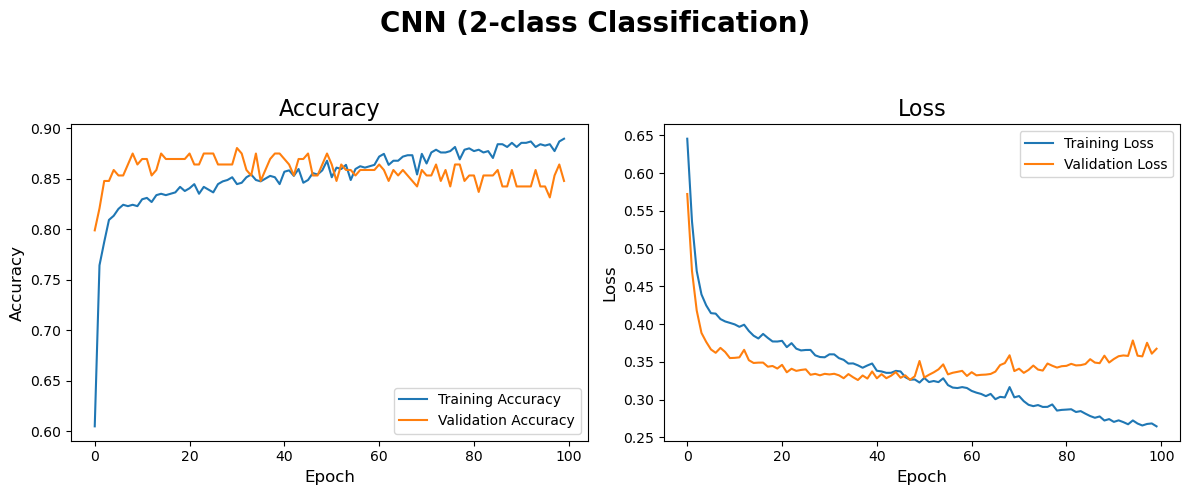

In [180]:
plot_history(history.history, "CNN (2-class Classification)")

###### Confusion Matrix

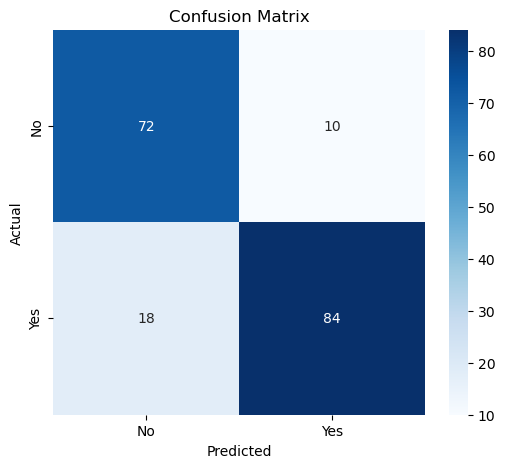

In [181]:
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No', 'Yes'],
            yticklabels=['No', 'Yes'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Comparison of Deep Learning Model Performance

✅ Evaluating model: Simple NN...
✅ Evaluating model: DNN...
✅ Evaluating model: ANN...
✅ Evaluating model: MLP...
✅ Evaluating model: CNN...
⚠️ Direct prediction failed, trying reshaping...
❌ Error evaluating CNN: 'DataFrame' object has no attribute 'reshape'

📊 Model Performance Comparison:

       Model  Accuracy  Precision    Recall  F1-Score
0  Simple NN  0.445652   0.198606  0.445652  0.274763
1        DNN  0.445652   0.198606  0.445652  0.274763
2        ANN  0.445652   0.198606  0.445652  0.274763
3        MLP  0.445652   0.198606  0.445652  0.274763


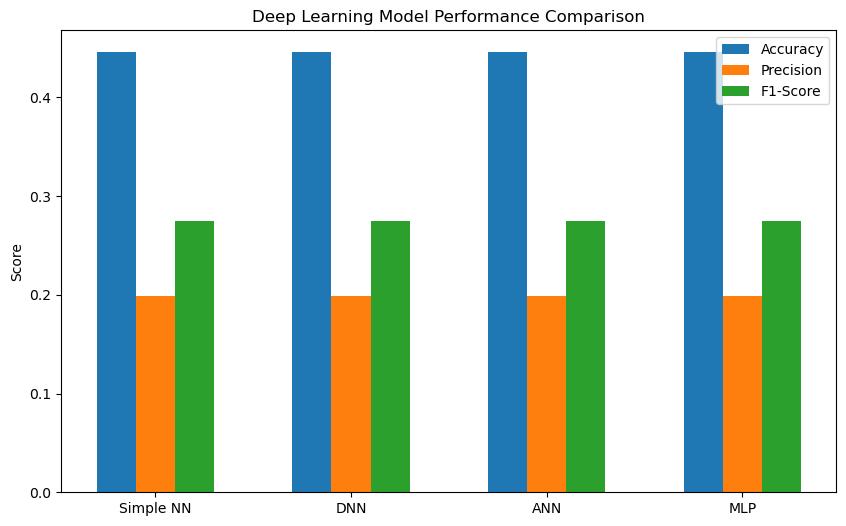

In [182]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# ============================================================
# 1️⃣ Define Safe Evaluation Function
# ============================================================
def evaluate_model_on_test(model, X_test, y_test):
    """
    Safely evaluate any trained deep learning model on the test dataset.
    Handles 2D/3D/4D input shapes automatically.
    """
    try:
        # Try predicting directly first
        y_pred_prob = model.predict(X_test, verbose=0)
    except Exception as e:
        print("⚠️ Direct prediction failed, trying reshaping...")

        # Try adding channel dimension for CNNs
        if len(X_test.shape) == 3:
            X_test_input = np.expand_dims(X_test, axis=-1)
        elif len(X_test.shape) == 2:
            # Some CNNs expect 3D input (samples, features, 1)
            X_test_input = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
        else:
            raise ValueError(f"❌ Unsupported input shape: {X_test.shape}")

        # Try predicting again
        y_pred_prob = model.predict(X_test_input, verbose=0)

    # Convert probabilities to class labels
    y_pred = np.argmax(y_pred_prob, axis=1)

    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    return accuracy, precision, recall, f1


# ============================================================
# 2️⃣ Define Your Trained Models
# ============================================================
models_dict = {
    "Simple NN": simple_nn,
    "DNN": dnn_model,
    "ANN": ann_model,
    "MLP": mlp_model,
    "CNN": cnn_model,
}

# ============================================================
# 3️⃣ Evaluate Models Safely
# ============================================================
results_deep = []

for model_name, model in models_dict.items():
    if not hasattr(model, "predict"):
        print(f"⚠️ Skipping '{model_name}' — not a valid model.")
        continue

    print(f"✅ Evaluating model: {model_name}...")

    try:
        acc, precision, recall, f1 = evaluate_model_on_test(model, X_test, y_test)
        results_deep.append({
            "Model": model_name,
            "Accuracy": acc,
            "Precision": precision,
            "Recall": recall,
            "F1-Score": f1
        })
    except Exception as e:
        print(f"❌ Error evaluating {model_name}: {e}")
        continue

# ============================================================
# 4️⃣ Show Results
# ============================================================
results_df2 = pd.DataFrame(results_deep)
print("\n📊 Model Performance Comparison:\n")
print(results_df2)

# ============================================================
# 5️⃣ Visualization (Optional)
# ============================================================
plt.figure(figsize=(10,6))
bar_width = 0.2
x = np.arange(len(results_df2))

plt.bar(x - bar_width, results_df2["Accuracy"], width=bar_width, label="Accuracy")
plt.bar(x, results_df2["Precision"], width=bar_width, label="Precision")
plt.bar(x + bar_width, results_df2["F1-Score"], width=bar_width, label="F1-Score")

plt.xticks(x, results_df2["Model"])
plt.ylabel("Score")
plt.title("Deep Learning Model Performance Comparison")
plt.legend()
plt.show()



Best Model (Deep Learning):
Model        Simple NN
Accuracy      0.445652
Precision     0.198606
Recall        0.445652
F1-Score      0.274763
Name: 0, dtype: object


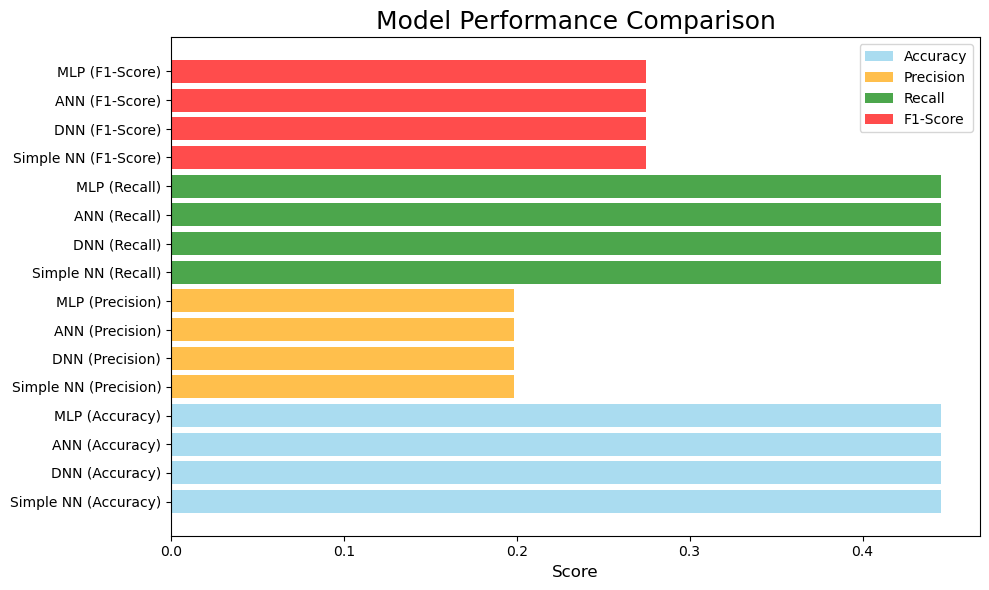


Optimal Model based on Accuracy: Simple NN with Accuracy = 0.4457


In [183]:
best_model2 = results_df2.loc[results_df2['Accuracy'].idxmax()]
print("\nBest Model (Deep Learning):")
print(best_model2)

metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
colors = ["skyblue", "orange", "green", "red"]

fig, ax = plt.subplots(figsize=(10, 6))

for i, metric in enumerate(metrics):
    ax.barh(results_df2["Model"] + f" ({metric})", results_df2[metric], color=colors[i], alpha=0.7, label=metric)

ax.set_xlabel("Score", fontsize=12)
ax.set_title("Model Performance Comparison", fontsize=18)
ax.legend()
plt.tight_layout()
plt.show()

print(f"\nOptimal Model based on Accuracy: {best_model2['Model']} with Accuracy = {best_model2['Accuracy']:.4f}")

# Comparison of Machine Learning Model Performance

In [184]:
all_model_score=[lr_score,svm_score,dtc_score,rfc_score,nv_score,knn_score,xgb_score]
model_name = ['LogisticR','SVM','DecisionTree','RandomForest','Naive Bayes','KNN','Ensemble']
print('Done')

Done


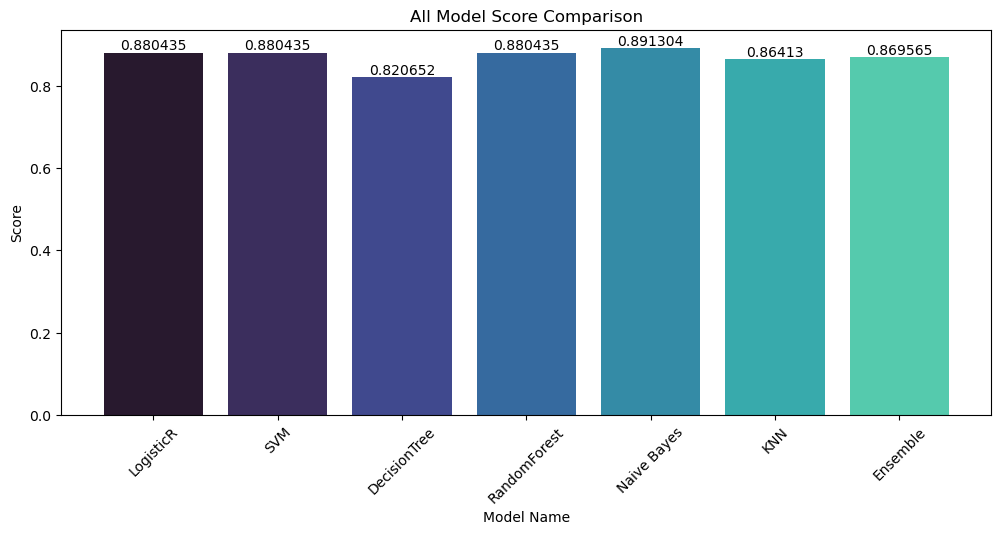

In [185]:
plt.figure(figsize=(12,5))
plt.title('All Model Score Comparison')
ax = plt.bar(x = model_name, height= all_model_score,color = sns.color_palette('mako',8))
plt.bar_label(ax)
plt.xlabel('Model Name')
plt.ylabel('Score')
plt.xticks(rotation = 45)
plt.show()

### Model Save

#####lr has Highest Score so the Final Model is Logistic Regression

In [190]:
pip install pickle5

Note: you may need to restart the kernel to use updated packages.Collecting pickle5
  Using cached pickle5-0.0.11.tar.gz (132 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for pickle5
Failed to build pickle5



  DEPRECATION: Building 'pickle5' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'pickle5'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [28 lines of output]
  C:\anaconda3\Lib\site-packages\setuptools\dist.py:759: SetuptoolsDeprecationWarning: License classifiers are deprecated.
  !!
  
          ********************************************************************************
          Please consider removing the following classifiers in favor of a SPDX license expression:
  
          License :: OSI Approved :: Python Software Foundation License
  
    

In [187]:
import pickle
with open('heart_disease_pred.pkl','wb') as f:
    pickle.dump(lr,f)
print('done')

done


In [188]:
import os
cr=os.getcwd()
print(cr)

C:\Users\Dell\Heart Disease Prediction


In [189]:
model.save('heart_disease_pred_model.keras')